In [3]:
import math

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from sympy.interactive import printing
from IPython.display import display, display_latex

printing.init_printing(use_latex="matplotlib")
x, y = symbols('x y')
K, D, h, Q, N, T, TCU = symbols('K D h Q^* N T TCU')

precio_unitario = 20000
demanda_unidades = 800000 # D
costos_unitarios_fijos = 200000 # K
costos_unitarios_almacenamiento = 400000 # h


def display_eq(lhs, rhs):
    display(Eq(lhs, rhs))



# Punto 1
Cantidad óptima de procesadores a solicitar al proveedor para que los costos de Orange SA sean mínimos. Calcular a cuánto asciende en cada caso.


ValueError: expected dimension or 1

reemplazando


ValueError: expected dimension or 1

ValueError: expected dimension or 1

ValueError: expected dimension or 1

# Punto 2
Tiempo en que se consume el lote óptimo, expresado en días o en horas.
c_p cantidad⍽que⍽se⍽produce⍽anualmente


ValueError: expected dimension or 1

ValueError: expected dimension or 1

ValueError: expected dimension or 1

Asumiendo trabajo 24h/dia, el tiempo en que se consume el lote es 0.279375000000000 días
# Punto 3
Cantidad de veces que debe solicitar los lotes asociado a la política óptima.
Se deben solicitar los lotes 894.854586129754 veces al año
# Punto 4
menos 20% 715.541752799933
mas 20% 1073.31262919990


# Punto 5


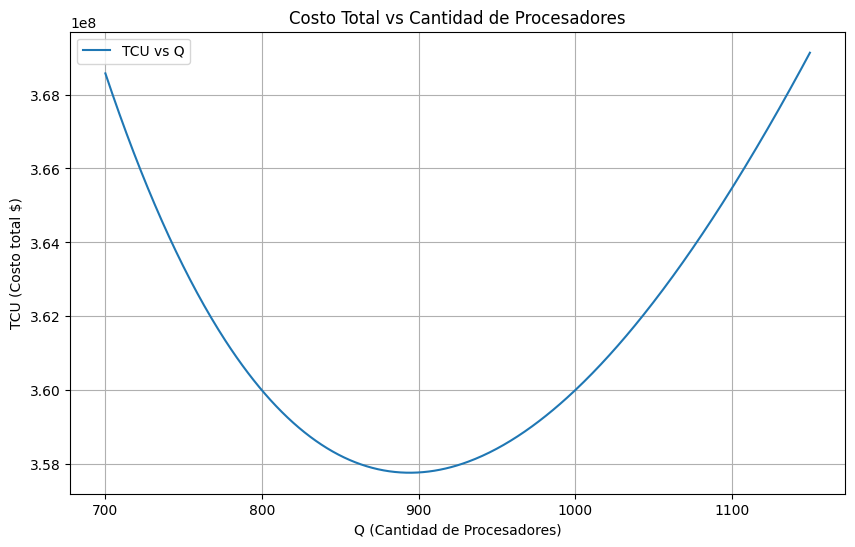

In [4]:
with sp.evaluate(False):
    Q_optima = sqrt(2*K*D/h)
    NN = D/Q_optima
    TT = 1/NN
    # Ct_optimo = sqrt(2*K*D*h)
    # 
    # costo_pedidos = D/Q * K
    # costo_conservacion = Q/2 * h
    # costo_total = costo_pedidos + costo_conservacion
    # 
    print("# Punto 1")
    print("Cantidad óptima de procesadores a solicitar al proveedor para que los costos de Orange SA sean mínimos. Calcular a cuánto asciende en cada caso.")
    display_eq(Q, Q_optima)
    print("reemplazando")
    display_eq(Q, Q_optima.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento))
    display_eq(Q, Q_optima.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf())
    
    q_optima = Q_optima.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf()
    TTCU = K/(q_optima/D) + h*(q_optima/2)
    
    display_eq(TCU, TTCU)
    display_eq(TCU, TTCU.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento))
    display_eq(TCU, TTCU.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf())
    
    print("# Punto 2")
    print("Tiempo en que se consume el lote óptimo, expresado en días o en horas.")
    c_p = symbols('\u237D'.join('cantidad que se produce anualmente'.split()))
    print("c_p", c_p)
    c_trab = symbols('\u237D'.join('cantidad días trabajados anualmente'.split()))
    # c_p, c_trab = symbols('"cantidad que se produce anualmente" "cantidad dias trabajados anualmente"')
    p2 = c_p/c_trab
    
    display_latex()
    
    display_eq(p2, p2.subs(c_p, demanda_unidades).subs(c_trab, 250))
    display_eq(p2, p2.subs(c_p, demanda_unidades).subs(c_trab, 250).evalf())
    
    unidades_diarias = p2.subs(c_p, demanda_unidades).subs(c_trab, 250).evalf()
    
    consumo_lote = symbols('\u237D'.join('Consumo de lote optimo'.split()))
    c_l = 894 / unidades_diarias
    display_eq(consumo_lote, c_l)
    display_eq(consumo_lote, c_l.evalf())
    print(f"Asumiendo trabajo 24h/dia, el tiempo en que se consume el lote es {c_l.evalf()} días")
    
    # N = D/Q
    # 
    # display(N.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento))
    # display(N.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf())
    # display(T.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf())
    
    print("# Punto 3")
    print("Cantidad de veces que debe solicitar los lotes asociado a la política óptima.")
    
    solicitudes = 250 / c_l
    print(f"Se deben solicitar los lotes {solicitudes.evalf()} veces al año")
    
    print("# Punto 4")
    TTCU = K/(Q/D) + h*(Q/2)
    print(f"menos 20% {(q_optima*.8).evalf()}")
    print(f"mas 20% {(q_optima*1.2).evalf()}")
    
    display_eq(TCU, TTCU.subs(Q, q_optima*.8).subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf())
    display_eq(TCU, TTCU.subs(Q, q_optima).subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf())
    display_eq(TCU, TTCU.subs(Q, q_optima*1.2).subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento).evalf())
    
    print("# Punto 5")
    TTTCU = TTCU.subs(K, costos_unitarios_fijos).subs(D, demanda_unidades).subs(h, costos_unitarios_almacenamiento)
    TCU_func = sp.lambdify(Q, TTTCU, "numpy")

    # Generate values for Q between 700 and 1150
    Q_values = np.linspace(700, 1150, 500)
    TCU_values = TCU_func(Q_values)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(Q_values, TCU_values, label=f'TCU vs Q')
    plt.xlabel('Q (Cantidad de Procesadores)')
    plt.ylabel('TCU (Costo total $)')
    plt.title('Costo Total vs Cantidad de Procesadores')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    